<a href="https://colab.research.google.com/github/roybibek/Linear-regression/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
#trX =   (trX - np.min(trX)) / (np.max(trX) - np.min(trX))
#print(trX)

In [0]:
noise = np.random.randn(*trX.shape) * 0.33

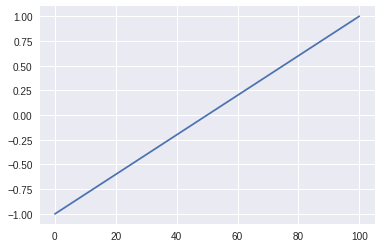

In [4]:
plt.plot(trX)

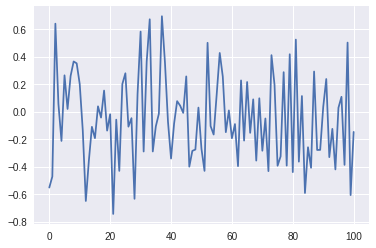

In [5]:
plt.plot(noise)

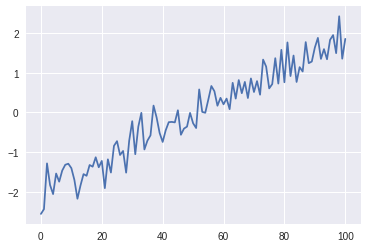

In [6]:
trY = 2 * trX + noise# create a y value which is approximately linear but with some random noise
plt.plot(trY)

In [7]:
noise

array([-0.55283826, -0.4728274 ,  0.63882346,  0.05530292, -0.21396656,
        0.26328713,  0.018525  ,  0.25832013,  0.36399347,  0.35027105,
        0.19947192, -0.13813224, -0.65078131, -0.35761544, -0.11121647,
       -0.1936663 ,  0.03773116, -0.04409894,  0.15242923, -0.13893011,
       -0.01959486, -0.74461286, -0.05918801, -0.43163899,  0.19967591,
        0.27820628, -0.11006231, -0.04826173, -0.63471237,  0.12827093,
        0.58121266, -0.2907143 ,  0.3639975 ,  0.6706506 , -0.29073022,
       -0.10787538, -0.01622659,  0.69283747,  0.35705083, -0.07518847,
       -0.34210314, -0.0883862 ,  0.07540469,  0.04250176, -0.00995541,
        0.25546593, -0.401089  , -0.28622307, -0.27635281,  0.02867398,
       -0.27180712, -0.43185808,  0.49965286, -0.10603759, -0.16732472,
        0.12448949,  0.42605351,  0.25419729, -0.15027554,  0.00800068,
       -0.19444195, -0.09114474, -0.39705571,  0.22593046, -0.21125137,
        0.21489284, -0.1552075 ,  0.08858236, -0.35674734,  0.09

In [8]:
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform',activation='linear'))
model.compile(optimizer='sgd', loss='mse')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Print initial weights
weights = model.layers[0].get_weights()
print(weights)
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

[array([[-0.01377499]], dtype=float32), array([0.], dtype=float32)]
Linear regression model is initialized with weight w: -0.01, b: 0.00


In [0]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

In [12]:
model.fit(trX,trY,nb_epoch=100,verbose=1,callbacks=[tensorboard])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
101/101 [==============================] - 0s 2ms/step - loss: 1.3882
Epoch 2/100
101/101 [==============================] - 0s 91us/step - loss: 1.3096
Epoch 3/100
101/101 [==============================] - 0s 100us/step - loss: 1.2497
Epoch 4/100
101/101 [==============================] - 0s 66us/step - loss: 1.1866
Epoch 5/100
101/101 [==============================] - 0s 113us/step - loss: 1.1353
Epoch 6/100
101/101 [==============================] - 0s 77us/step - loss: 1.0859
Epoch 7/100
101/101 [==============================] - 0s 62us/step - loss: 1.0346
Epoch 8/100
101/101 [==============================] - 0s 58us/step - loss: 0.9825
Epoch 9/100
101/101 [==============================] - 0s 59us/step - loss: 0.9333
Epoch 10/100
101/101 [==============================] - 0s 78us/step - loss: 0.8922
Epoch 11/100
101/101 [==============================] - 0s 68us/step - loss: 0.8541
Epoch 12/100
101/101 [==============================] - 0s 84us/step - loss: 0.8139


In [13]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.81, b: -0.06


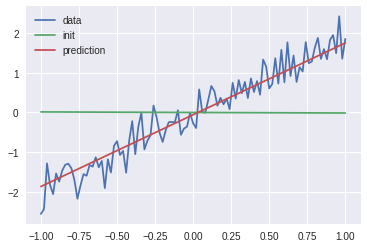

In [14]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

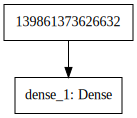

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes='True') # to save above